<a href="https://colab.research.google.com/github/Lcns99/regressaolinear/blob/main/regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
#Cria o df com as colunas idade e salário anual
df = pd.DataFrame({'Idade': [18,25,57,45,26,64,37,40,24,33], 'Salário Anual': [15000,29000,68000,52000,32000,80000,41000,45000,26000,33000]})
df.head()

,Idade,Salário Anual
0,18,15000
1,25,29000
2,57,68000
3,45,52000
4,26,32000


In [13]:
import numpy as np
xData = np.array(df['Idade']) #variável independente
yData = np.array(df['Salário Anual']) #variável dependente

In [14]:
#Definindo a função de otimização(regressão simples)
def equacaolinear(x,a,b):
  return a * x + b

In [15]:
#gerando os parâmetros iniciais para o otimizador
parametrosIniciais = np.array([1.0,1.0])

In [19]:
from scipy.optimize import curve_fit #biblioteca para realizar a otimização dos MSE
#Realizando a otimização através do erro médio quadrado(MSE)
parametrosOtimizados, pconv = curve_fit(equacaolinear, xData, yData, parametrosIniciais)
#parametrosOtimizados: contém os parâmetros de ajuste da curva
#pcov: contém a covariância dos parâmetros encontrados

In [20]:
#Realizando a previsão dos dados através do modelo (constrói a equação linear)
previsaoModelo = equacaolinear(xData,*parametrosOtimizados) #utiliza a função linear com os parâmetros otimizados

In [21]:
#Encontrando o erro absoluto (linhas verticais)
erroAbsoluto = previsaoModelo - yData #(valor previsto - valor real)

In [22]:
#Calculando o erro quadrático entre cada medida
SE = np.square(erroAbsoluto)
#Calculando o MSE
MSE = np.mean(SE)
print('SE: ', SE)
print('MSE: ', MSE)

SE:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE:  5479238.909036714


In [23]:
#Realizando o cálculo do coeficiente de determinação
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData))
print('Coeficiente de Determinação: ', Rsquared)

Coeficiente de Determinação:  0.9846300347582353


In [24]:
#Mostrando os parâmetros da regressão
print('Y = {}X {}'.format(parametrosOtimizados[0], parametrosOtimizados[1]))

Y = 1320.5325666669085X -6627.651716729711


Text(0, 0.5, 'Salário Anual(R$)')

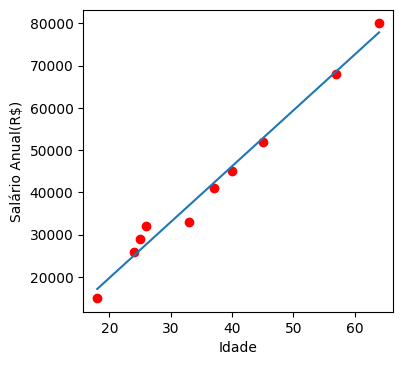

In [27]:
import matplotlib.pyplot as plt

#Plotando a figura
f = plt.figure(figsize = (4,4), dpi = 100) #indica o tamanho da figura
axes = f.add_subplot(111) #criar os objetos para o subplot

#Plotando os pontos no gráfico
axes.plot(xData, yData, 'ro')

#Criando os dados para serem utilizados na construção da linha (equação)
xModel = np.linspace(start= min(xData), stop= max(xData)) #valores mínimos e máximos da linha
yModel = equacaolinear(xModel, *parametrosOtimizados) #aplica a função com os parâmetros obtidos

#Plota a linha
axes.plot(xModel, yModel)
plt.xlabel('Idade')
plt.ylabel('Salário Anual(R$)')